<a href="https://colab.research.google.com/github/AgustinCocciardi/IA_Tps/blob/main/Normalizacion_Pandas_Trabajo_Pr%C3%A1ctico_ML_Regresi%C3%B3n_Predicci%C3%B3n_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico ML - Regresión Lineal - Predicción - Eficiencia Energética

---



Este dataset lo obtuvimos del repositorio de aprendizaje automático de UCI.
https://archive.ics.uci.edu/ml/datasets/energy+efficiency

Este estudio analizó la evaluación de los requisitos de carga de calefacción y carga de refrigeración de los edificios (es decir, la eficiencia energética) en función de los parámetros del edificio.

Realizamos análisis energéticos utilizando 12 formas de edificios diferentes. Los edificios se diferencian en cuanto a la superficie acristalada, la distribución de la superficie acristalada y la orientación, entre otros parámetros.

Features:
- Relative_Compactness
- Surface_Area
- Wall_Area
- Roof_Area
- Overall_Height
- Orientation
- Glazing_Area
- Glazing_Area_Distribution

Predict:
Heating_Load
Cooling_Load

# Contenido Teórico y Práctico para Desarrollo del Trabajo Práctico

**Importación Librerías**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# LINK SKLEARN LINEAR REGRESSION: https://scikit-learn.org/stable/search.html?q=linear+regression

**Carga Dataset**

In [2]:
dataset = pd.read_csv('/content/03_Energy-Efficiency_Dataset.csv')

**Análisis Dataset**

In [3]:
print('ENERGY EFFICIENCY DATASET - HEAD: \n', dataset.head(5))

ENERGY EFFICIENCY DATASET - HEAD: 
    Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.3

In [4]:
print('ENERGY EFFICIENCY DATASET - SHAPE: ', dataset.shape)

ENERGY EFFICIENCY DATASET - SHAPE:  (768, 10)


In [5]:
print('ENERGY EFFICIENCY DATASET - INFO: \n', dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
ENERGY EFFICIENCY DATASET - INFO: 
 None


In [6]:
print('ENERGY EFFICIENCY DATASET - STATISTICS: \n', dataset.describe())

ENERGY EFFICIENCY DATASET - STATISTICS: 
        Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.5000

**Análisis Datos**

Coeficientes Correlación (Ver referencia: [correlation matrix](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/))
Un coeficiente de correlación (normalmente denominado r) es un número único que describe el alcance de la relación lineal entre dos variables. Un valor de +1 indica una linealidad perfecta (las dos variables se mueven juntas, como "altura en pulgadas" y "altura en centímetros"). Un valor de r = 0 indica que no hay correlación (las variables son independientes) y r = -1 indica que las variables están inversamente correlacionadas (un aumento en una variable se asocia con una disminución en la otra).

ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: 
                            Relative_Compactness  Surface_Area  Wall_Area  \
Relative_Compactness                       1.00         -0.99      -0.20   
Surface_Area                              -0.99          1.00       0.20   
Wall_Area                                 -0.20          0.20       1.00   
Roof_Area                                 -0.87          0.88      -0.29   
Overall_Height                             0.83         -0.86       0.28   
Orientation                                0.00         -0.00      -0.00   
Glazing_Area                              -0.00          0.00      -0.00   
Glazing_Area_Distribution                 -0.00          0.00       0.00   
Heating_Load                               0.62         -0.66       0.46   
Cooling_Load                               0.63         -0.67       0.43   

                           Roof_Area  Overall_Height  Orientation  \
Relative_Compactness           -0.87        

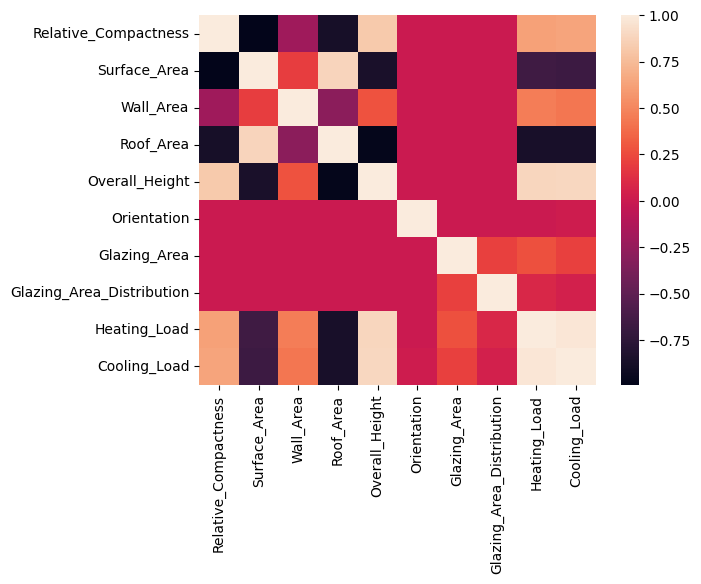

In [7]:
cormat = dataset.corr()
print('ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: \n', round(cormat,2))
sns.heatmap(cormat);

Visualización de Relación Lineal entre Pares de Features

In [ ]:
sns.pairplot(dataset[[
'Relative_Compactness',
'Surface_Area',
'Wall_Area',
'Roof_Area',
'Overall_Height',
'Orientation',
'Glazing_Area',
'Glazing_Area_Distribution',
'Heating_Load',
'Cooling_Load',
 ]]);

Otra técnica utilizada para identificar relación entre features para seleccionar las más relevantes podemos investigar [mutual_info de scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) y [ejemplo](https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a)

In [8]:
x = dataset.drop(labels=['Heating_Load','Cooling_Load'], axis=1)
x

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [9]:
y = dataset['Heating_Load']
y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

In [10]:
x_train_features, x_test_features, y_train_features, y_test_features = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [11]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train_features, y_train_features)
print('ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: \n', mutual_info)

ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: 
 [1.63066555 1.63324608 1.04010841 0.86197343 0.65035491 0.
 0.66074923 0.16555892]


In [12]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train_features.columns
mutual_info.sort_values(ascending=False)

Surface_Area                 1.633246
Relative_Compactness         1.630666
Wall_Area                    1.040108
Roof_Area                    0.861973
Glazing_Area                 0.660749
Overall_Height               0.650355
Glazing_Area_Distribution    0.165559
Orientation                  0.000000
dtype: float64

<Axes: >

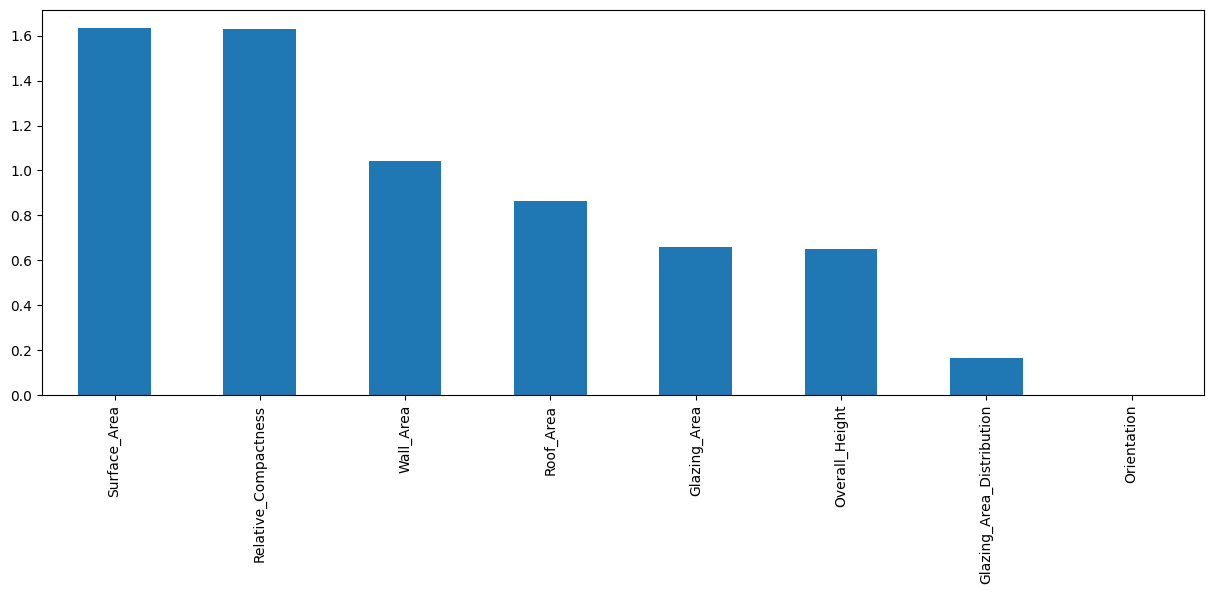

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Determinación Features Cols**

In [14]:
feature_cols = [
'Cooling_Load',
'Roof_Area',
'Overall_Height']
x = dataset[feature_cols]
print('ENERGY EFFICIENCY DATASET - X (FEATURES COLS): \n', x)
y = dataset.Heating_Load
print('ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): \n', y)

ENERGY EFFICIENCY DATASET - X (FEATURES COLS): 
      Cooling_Load  Roof_Area  Overall_Height
0           21.33     110.25             7.0
1           21.33     110.25             7.0
2           21.33     110.25             7.0
3           21.33     110.25             7.0
4           28.28     122.50             7.0
..            ...        ...             ...
763         21.40     220.50             3.5
764         16.88     220.50             3.5
765         17.11     220.50             3.5
766         16.61     220.50             3.5
767         16.03     220.50             3.5

[768 rows x 3 columns]
ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): 
 0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64


**Separación Set de Datos**

In [15]:
set_test_size = 0.2

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=set_test_size, random_state=0, shuffle=True)

In [17]:
x_train = x_train.values

In [18]:
x_train

array([[ 17.03, 220.5 ,   3.5 ],
       [ 34.17, 122.5 ,   7.  ],
       [ 33.01, 122.5 ,   7.  ],
       ...,
       [ 35.04, 122.5 ,   7.  ],
       [ 17.47, 220.5 ,   3.5 ],
       [ 28.2 , 147.  ,   7.  ]])

In [19]:
y_train = y_train.values

In [20]:
x_test = x_test.values

In [21]:
x_test

array([[ 17.63, 220.5 ,   3.5 ],
       [ 13.57, 220.5 ,   3.5 ],
       [ 34.62, 147.  ,   7.  ],
       [ 21.16, 147.  ,   7.  ],
       [ 33.34, 110.25,   7.  ],
       [ 34.2 , 122.5 ,   7.  ],
       [ 30.18, 110.25,   7.  ],
       [ 30.34, 147.  ,   7.  ],
       [ 29.82, 147.  ,   7.  ],
       [ 24.61, 147.  ,   7.  ],
       [ 11.67, 220.5 ,   3.5 ],
       [ 38.35, 147.  ,   7.  ],
       [ 14.65, 220.5 ,   3.5 ],
       [ 39.41, 147.  ,   7.  ],
       [ 37.7 , 147.  ,   7.  ],
       [ 31.06, 147.  ,   7.  ],
       [ 13.87, 220.5 ,   3.5 ],
       [ 34.33, 122.5 ,   7.  ],
       [ 15.38, 220.5 ,   3.5 ],
       [ 15.4 , 220.5 ,   3.5 ],
       [ 14.38, 220.5 ,   3.5 ],
       [ 33.13, 110.25,   7.  ],
       [ 14.14, 220.5 ,   3.5 ],
       [ 43.86, 147.  ,   7.  ],
       [ 11.17, 220.5 ,   3.5 ],
       [ 17.37, 220.5 ,   3.5 ],
       [ 14.47, 220.5 ,   3.5 ],
       [ 16.69, 220.5 ,   3.5 ],
       [ 14.27, 220.5 ,   3.5 ],
       [ 37.54, 147.  ,   7.  ],
       [ 1

In [22]:
y_test = y_test.values

**Normalizacion**

In [24]:
import pandas as pd

In [25]:
data = pd.DataFrame(x_train, columns=['Cooling_Load', 'Roof_Area', 'Overall_Height'])

In [26]:
z_scores = (data - data.mean()) / data.std()

In [28]:
z_scores

,Cooling_Load,Roof_Area,Overall_Height
0,-0.791140,0.957004,-0.983042
1,1.019742,-1.219294,1.015593
2,0.897185,-1.219294,1.015593
3,0.319266,-0.675220,1.015593
4,-0.905245,0.957004,-0.983042
...,...,...,...
609,-0.329439,0.957004,-0.983042
610,0.147053,-1.491332,1.015593
611,1.111659,-1.219294,1.015593
612,-0.744653,0.957004,-0.983042


In [30]:
nuevo_x_train = z_scores.values

In [31]:
nuevo_x_train

array([[-0.79114012,  0.9570042 , -0.98304235],
       [ 1.01974157, -1.21929424,  1.01559342],
       [ 0.89718481, -1.21929424,  1.01559342],
       ...,
       [ 1.11165913, -1.21929424,  1.01559342],
       [-0.74465307,  0.9570042 , -0.98304235],
       [ 0.3889969 , -0.67521963,  1.01559342]])

In [32]:
data = pd.DataFrame(x_test, columns=['Cooling_Load', 'Roof_Area', 'Overall_Height'])

In [33]:
z_scores = (data - data.mean()) / data.std()

In [36]:
nuevo_x_test = z_scores.values

In [37]:
nuevo_x_test

array([[-0.74362003,  1.03022105, -1.06371684],
       [-1.16089188,  1.03022105, -1.06371684],
       [ 1.00254961, -0.57775911,  0.93399527],
       [-0.38081963, -0.57775911,  0.93399527],
       [ 0.87099593, -1.38174919,  0.93399527],
       [ 0.95938356, -1.11375249,  0.93399527],
       [ 0.54622276, -1.38174919,  0.93399527],
       [ 0.56266697, -0.57775911,  0.93399527],
       [ 0.50922329, -0.57775911,  0.93399527],
       [-0.02624133, -0.57775911,  0.93399527],
       [-1.35616689,  1.03022105, -1.06371684],
       [ 1.38590528, -0.57775911,  0.93399527],
       [-1.04989346,  1.03022105, -1.06371684],
       [ 1.49484818, -0.57775911,  0.93399527],
       [ 1.31910067, -0.57775911,  0.93399527],
       [ 0.63666592, -0.57775911,  0.93399527],
       [-1.13005899,  1.03022105, -1.06371684],
       [ 0.97274448, -1.11375249,  0.93399527],
       [-0.97486675,  1.03022105, -1.06371684],
       [-0.97281122,  1.03022105, -1.06371684],
       [-1.07764306,  1.03022105, -1.063

**Definición Modelo**

In [38]:
regressor = LinearRegression()

**Entrenamiento Modelo**

In [39]:
regressor.fit(nuevo_x_train, y_train)

LinearRegression()

**Predicción Resultados**

In [40]:
y_pred = regressor.predict(nuevo_x_test)

In [41]:
print('ENERGY EFFICIENCY DATASET - Y PREDICTIONS: \n', y_pred)

ENERGY EFFICIENCY DATASET - Y PREDICTIONS: 
 [14.59203079 10.84813203 31.59455285 19.18251408 31.35883985 31.83700596
 28.44486938 27.64778272 27.16826859 22.36390589  9.09606118 35.03414457
 11.84404598 36.01161568 34.43475191 28.31172536 11.12477479 31.95688449
 12.51721005 12.5356529  11.59506749 31.16518991 11.37375328 40.11515004
  8.6349899  14.35227373 11.67806032 13.72521679 11.49363181 34.2872091
 11.21698905 13.21803839 42.49427782 13.29180979 28.07601236 33.56141253
 13.16270983 34.35445512 14.19550949 13.80820962 10.96801056 33.57715934
 14.19550949 24.02376249 24.84446936 24.60875636 11.14321764 12.32356011
 30.57367066 28.25639681 31.91212538 11.49363181 31.69868457 14.60125222
 34.60343361 10.96801056 20.28390779 28.6160324  34.02900919 13.91886673
 15.02543779 12.08380305 31.83835398 10.98645341 12.95061705 11.69650317
 42.06087082 11.75183173 29.21542506 33.66937359 30.84244002 11.05100339
 22.5114487  13.88198103 16.29799451 27.22359715 30.99920425 39.99527151
 30.934

**Evaluación Modelo**

In [42]:
from sklearn.metrics import mean_squared_error

Mean Squared Error (Ver referencia: [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))

In [43]:
print('ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR: ', mean_squared_error(y_test, y_pred))

ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR:  6.330608754021341


Coeficientes Regressor (Ver referencia: [regressor.coef_ property](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-regression))

In [44]:
regressor.coef_

array([ 8.97232524, -1.17492677, -0.27728663])

Score de Evaluación

In [45]:
regressor.score(nuevo_x_test, y_test)

0.9426711716718407

Ver ejemplo para balancear dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
x_res_over_sampler, y_res_over_sampler = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res_over_sampler)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_over_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
x_res_under_sampler, y_res_under_sampler = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_under_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()